In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Two ways to identify outliers:
>1. Z score : https://www.youtube.com/watch?v=R-P8qEGXnBs  
>    https://www.youtube.com/watch?v=MicmZlGfGJg&pp=ygUPc3RhdHMgcXVlc3Rpb25z
>2. IQR
>3. SCATTER PLOT
>4. Box Plot
>5. percentile method : https://www.youtube.com/watch?v=bcXA4CqRXvM&t=285s
>6. Winsorization

## Detecting Outlier using Z score

In [12]:
df = pd.read_csv(r"src/challenger.csv")

In [13]:
df.head()

,o_ring_ct,distress_ct,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [44]:
outlier = []

threshold = 3

data = np.random.randint(3, 20,30).tolist()
data.append(2000)

mean  = np.mean(data)
std = np.std(data)

for i in data :
    z_score = (i-mean)/std  
    if np.abs(z_score) > threshold : 
        outlier.append(i)



In [46]:
outlier

[2000]

## Detecting outlier using IQR

In [63]:
data = np.random.randint(3,20,30).tolist()

data.extend([52,-43,70])



{'whiskers': [<matplotlib.lines.Line2D at 0x1ae8e8baa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae8e8c71c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae8e8ba6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae8e8c78e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae8e8c7c70>],
 'means': []}

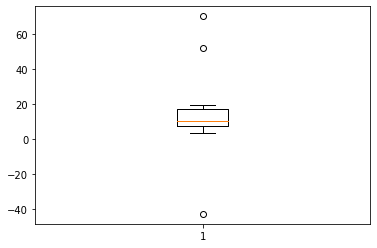

In [64]:
# getting the box plot of the data to show outlier

plt.boxplot(data)

In [65]:
# extract 25th and 75th percentile values
data25, data75 = np.percentile(data,[25,75])

In [66]:
iqr  = data75-data25

# find lower and upper fence

lower_fence = data25-(1.5*iqr)

upper_fence = data75+(1.5*iqr)

In [67]:
print('upper and lower fence value is ',upper_fence, lower_fence)

upper and lower fence value is  32.0 -8.0


values less that or greater than the lower and upper fence would be considered as outliers as per IQR method

## Percentile Method

In [105]:
# read pandas dataframe for other analysis

df_2 = pd.read_csv(r"src/exercise_dataset.csv")

In [106]:
df_2.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [107]:
df_2.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [109]:
df_2.shape

(3864, 12)

In [110]:
# filtering numerical values from the dataset
df_2_num = df_2.select_dtypes(include =['float64','int64'])

In [111]:
lower_limit  = df_2['Calories Burn'].quantile(0.01)
upper_limit = df_2['Calories Burn'].quantile(0.99)


In [115]:
df_2_new = df_2[(df_2['Calories Burn']>lower_limit) & (df_2['Calories Burn']<upper_limit)]

In [116]:
df_2_new.shape

(3786, 12)

we can see the that rows have reduced as per the percentile values 0.01 and 0.99 